<a href="https://colab.research.google.com/github/koushik-mahato/College-Project/blob/Heart-Disease-Prediction-Using-Deep-Learning/Down_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
LABELS = ["Don't Have Heart Disease", "Have Heart Disease"]

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/heart_disease_health_indicators_BRFSS2015.csv')
cardio = data

In [ ]:
cardio.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
cardio.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["HeartDiseaseorAttack"]]
# Store the variable we are predicting
target = "HeartDiseaseorAttack"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(253680, 21)
(253680,)


In [ ]:
data.isnull().values.any()

False

Text(0, 0.5, 'Count')

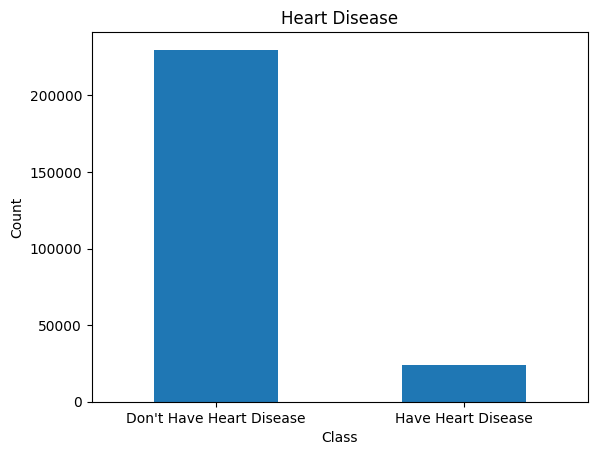

In [ ]:
count_classes = pd.value_counts(data['HeartDiseaseorAttack'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Heart Disease")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Count")

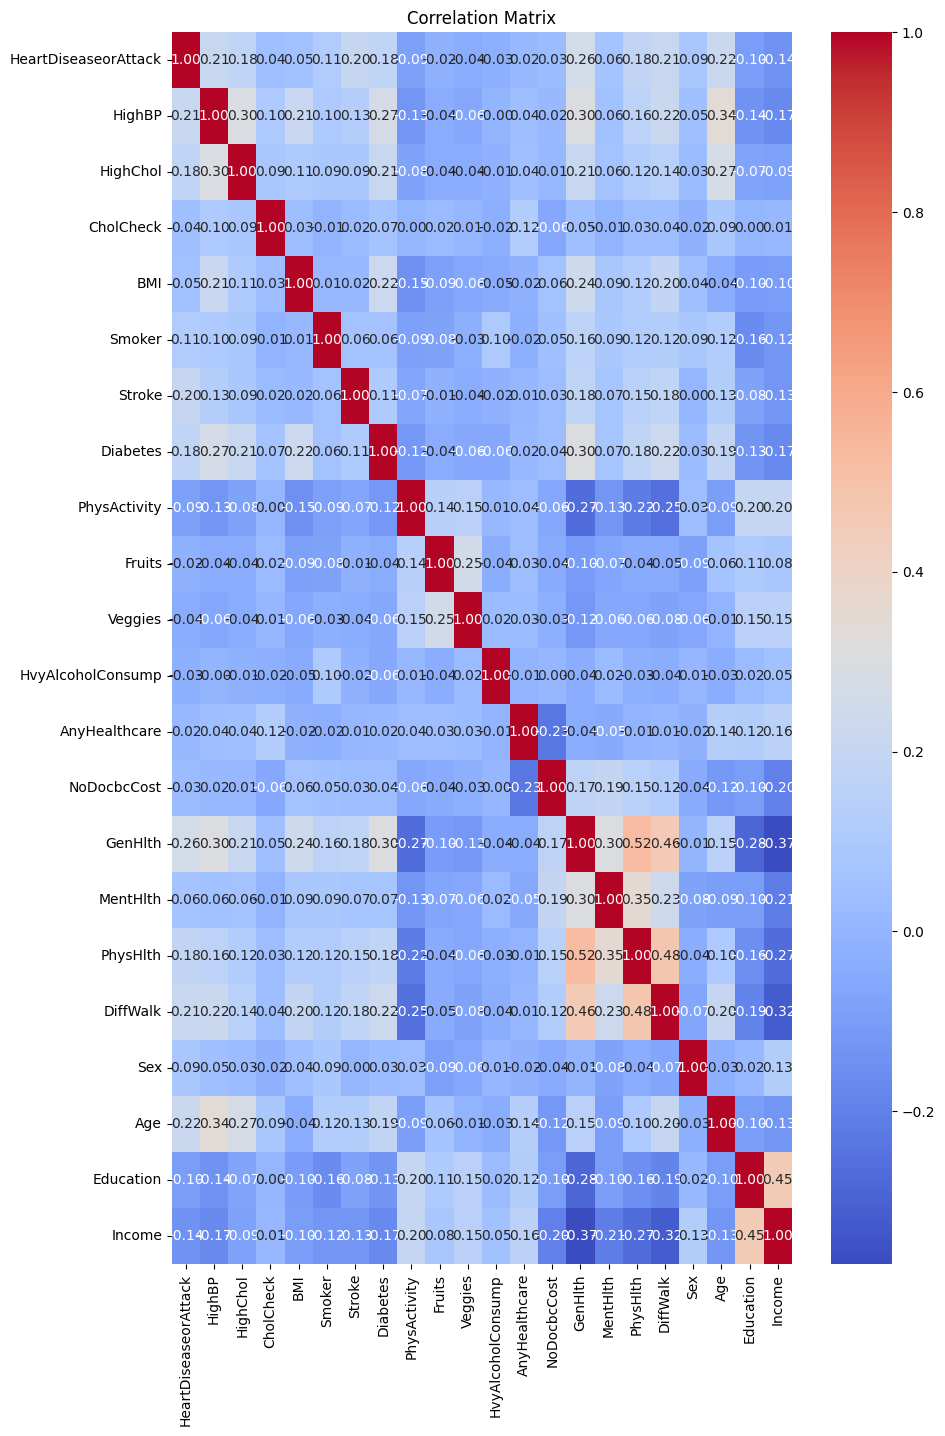

In [ ]:
plt.figure(figsize=(10, 16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f",)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
have_had_heart_disease = data[data['HeartDiseaseorAttack']==1]

have_not_had_heart_disease = data[data['HeartDiseaseorAttack']==0]

In [ ]:
print(have_had_heart_disease.shape,have_not_had_heart_disease.shape)

(23893, 22) (229787, 22)


In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Undersampling for Handling Imbalanced
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [ ]:
X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_series = pd.Series(y_res, name=Y.name)
resampled_df = pd.concat([X_res_df, y_res_series], axis=1)

Text(0, 0.5, 'Count')

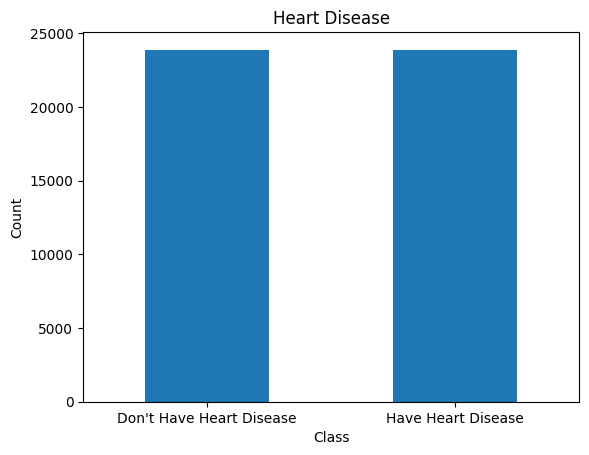

In [ ]:
count_classes = pd.value_counts(resampled_df['HeartDiseaseorAttack'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Heart Disease")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Count")

In [ ]:
X_res.shape,y_res.shape

((47786, 21), (47786,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0.0: 229787, 1.0: 23893})
Resampled dataset shape Counter({0.0: 23893, 1.0: 23893})


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [ ]:
# split the dataset to the train and test set, prepare for training model
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (35839, 21)
y_train:  (35839,)
---
X_test:  (11947, 21)
y_test:  (11947,)


In [ ]:
X_test.shape

(11947, 21)

In [ ]:
results = {}

In [ ]:
# Model training
mlp = MLPClassifier(max_iter=300, random_state=110)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=110)

In [ ]:
# Model predictions
y_pred = mlp.predict(X_test)

In [ ]:
results['MLP'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted'),
]

In [ ]:
# Calculate accuracy_precision, recall, F1 score, and confusion matrix
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
precision_percentage = precision_score(y_test, y_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

accuracy:  <function accuracy_score at 0x7927962c6710>
accuracy:  90.51644764375995
precision:  90.88750322898261
recall:  90.51644764375995
f1_score:  90.49492494649982
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5973
         1.0       0.95      0.86      0.90      5974

    accuracy                           0.91     11947
   macro avg       0.91      0.91      0.90     11947
weighted avg       0.91      0.91      0.90     11947



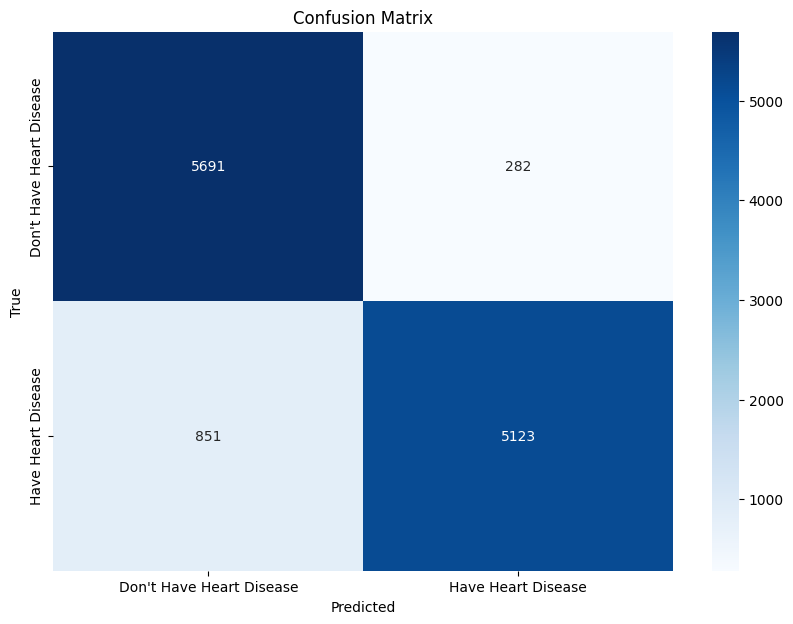

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

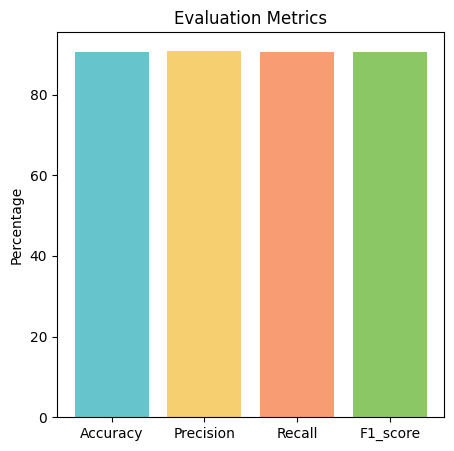

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(5, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

plt.show()


In [ ]:
import joblib

In [ ]:
# Save the model and the scaler
joblib.dump(mlp, 'heart_disease_model_1.joblib')
joblib.dump(scaler, 'scaler_1.joblib')

['scaler_1.joblib']

In [ ]:
# Function to make predictions and provide risk percentage on new input data
def predict_heart_disease_with_risk(input_data):
    # Load the model and the scaler
    model = joblib.load('heart_disease_model_1.joblib')
    scaler = joblib.load('scaler_1.joblib')

    # Ensure input_data is a DataFrame to match the scaler's expected format
    input_data_df = pd.DataFrame(input_data, columns=columns)

    # Scale the input data
    input_data_scaled = scaler.transform(input_data_df)

    # Make predictions
    predictions = model.predict(input_data_scaled)
    probabilities = model.predict_proba(input_data_scaled)

    # Convert predictions to integer type
    predictions = predictions.astype(int)

    # Map predictions to labels and calculate risk percentage
    prediction_results = []
    for pred, prob in zip(predictions, probabilities):
        risk_percentage = prob[1] * 100  # Probability of having heart disease
        prediction_results.append({
            "Prediction": LABELS[pred],
            "Risk Percentage": risk_percentage
        })

    return prediction_results

# Example input data for prediction (assuming 2 samples and 21 features as per original dataset)
example_input_data = np.array([
    [1.0,1.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0]
])

# Predict heart disease with risk percentage
predictions_with_risk = predict_heart_disease_with_risk(example_input_data)
print(predictions_with_risk)

[{'Prediction': 'Have Heart Disease', 'Risk Percentage': 99.71500403814917}]


In [ ]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
X_train_cnn = X_train_std.reshape(X_train_std.shape[0], X_train_std.shape[1], 1)
X_test_cnn = X_test_std.reshape(X_test_std.shape[0], X_test_std.shape[1], 1)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import seaborn as sns
from tensorflow.python.keras import layers, models
from tensorflow.python.keras.engine import data_adapter
def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [ ]:
cnn = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 19, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12352     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/10
1120/1120 [==============================] - 6s 5ms/step - loss: 0.3068 - accuracy: 0.8672 - val_loss: 0.2868 - val_accuracy: 0.8724
Epoch 2/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.2833 - accuracy: 0.8802 - val_loss: 0.2762 - val_accuracy: 0.8832
Epoch 3/10
1120/1120 [==============================] - 8s 7ms/step - loss: 0.2744 - accuracy: 0.8843 - val_loss: 0.2750 - val_accuracy: 0.8816
Epoch 4/10
1120/1120 [==============================] - 5s 4ms/step - loss: 0.2687 - accuracy: 0.8859 - val_loss: 0.2694 - val_accuracy: 0.8881
Epoch 5/10
1120/1120 [==============================] - 7s 6ms/step - loss: 0.2669 - accuracy: 0.8882 - val_loss: 0.2722 - val_accuracy: 0.8868
Epoch 6/10
1120/1120 [==============================] - 5s 5ms/step - loss: 0.2643 - accuracy: 0.8889 - val_loss: 0.2658 - val_accuracy: 0.8893
Epoch 7/10
1120/1120 [==============================] - 5s 4ms/step - loss: 0.2642 - accuracy: 0.8889 - val_loss: 0.2621 - val_accuracy:

In [ ]:
# Predict probabilities for test data
y_pred_prob = cnn.predict(X_test_cnn)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype("int32")
# Calculate accuracy_precision, recall, F1 score, and confusion matrix
accuracy_percentage = accuracy_score(y_test, y_pred_binary) * 100
precision_percentage = precision_score(y_test, y_pred_binary, average='weighted') * 100
recall_percentage = recall_score(y_test, y_pred_binary, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_pred_binary, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
# Generate classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(class_report)

results['CNN'] = [
    accuracy_score(y_test, y_pred_binary),
    precision_score(y_test, y_pred_binary, average='weighted'),
    recall_score(y_test, y_pred_binary, average='weighted'),
    f1_score(y_test, y_pred_binary, average='weighted')
]

accuracy:  <function accuracy_score at 0x7927962c6710>
accuracy:  88.82564660584246
precision:  89.20953628962826
recall:  88.82564660584246
f1_score:  88.79828102674671
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      5973
         1.0       0.93      0.84      0.88      5974

    accuracy                           0.89     11947
   macro avg       0.89      0.89      0.89     11947
weighted avg       0.89      0.89      0.89     11947



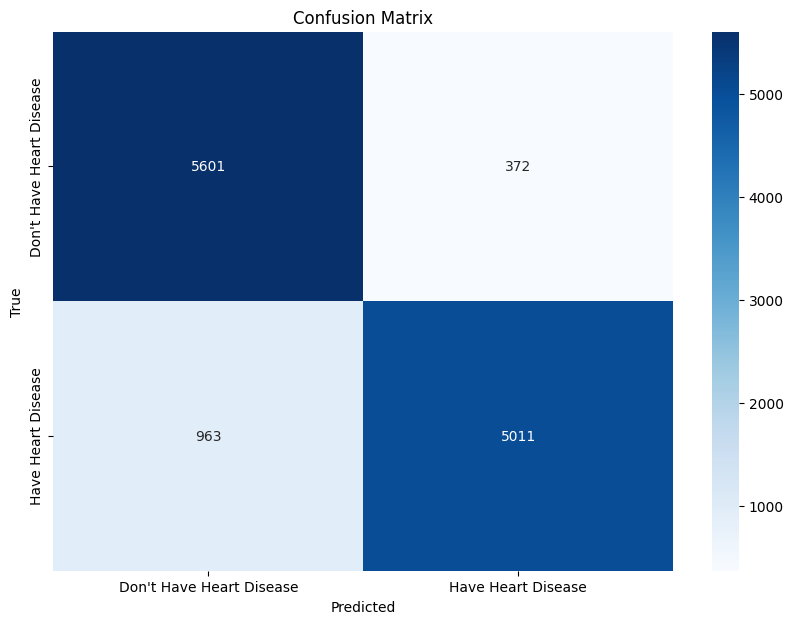

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

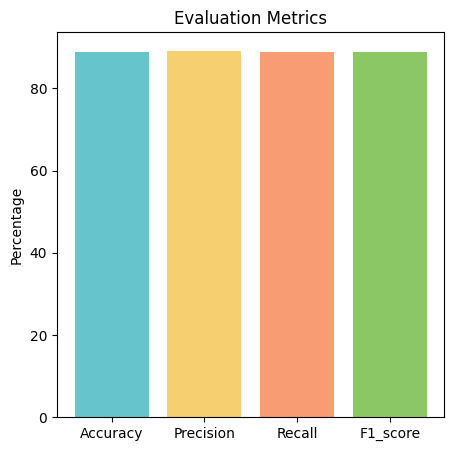

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary) * 100
precision = precision_score(y_test, y_pred_binary, average='weighted') * 100
recall = recall_score(y_test, y_pred_binary, average='weighted') * 100
f1 = f1_score(y_test, y_pred_binary, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(5, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

plt.show()


In [ ]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score
MLP,0.905164,0.908875,0.905164,0.904949
CNN,0.888256,0.892095,0.888256,0.887983


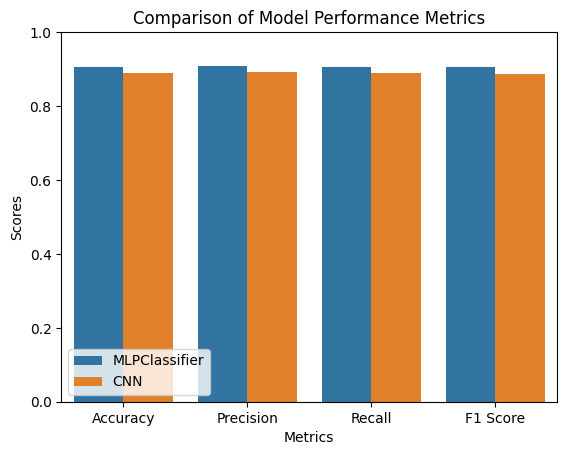

In [ ]:
# Data preparation
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'MLPClassifier': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'),
                      recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')],
    'CNN': [accuracy_score(y_test, y_pred_binary), precision_score(y_test, y_pred_binary, average='weighted'),
            recall_score(y_test, y_pred_binary, average='weighted'), f1_score(y_test, y_pred_binary, average='weighted')]
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melt = df.melt(id_vars='Metrics', var_name='Classifiers', value_name='Scores')
barplot = sns.barplot(x='Metrics', y='Scores', hue='Classifiers', data=df_melt)

# Adding titles and labels
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)

plt.legend(loc='lower left')
# Show the plot
plt.show()